In [63]:
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 250

import matplotlib.pyplot as plt

import pysam
import singlecellmultiomics.molecule
import singlecellmultiomics.fragment
import pysamiterators
import pandas as pd

nla_test_bam_path = '../data/mini_nla_test.bam'

In [64]:
# iterate over the reads in  nla_test_bam_path using pysam ...
with pysam.AlignmentFile(nla_test_bam_path) as alignments:
    for i,read in enumerate( alignments ):
        print(str(read))
        if i>=1:
            break

ST-E00285:221:HKM7VCCXY:6:2211:11485:25534	1171	0	164834715	60	151M	0	164834656	151	GAGTTATGAAATCCCTTGCTAACTTTCTCTTCTCTGGGGAAAAGAGTCTGAGTTCCCTCAGCCTTTCTTCCTAAGACCTGTGGTTGGCTATAAATTGCATTGGTTGCTCTTCTCTAATGACCTCTGGAGATTGGCAACACCAAACAAAGAC	array('B', [12, 41, 41, 32, 41, 37, 37, 37, 41, 41, 41, 37, 37, 41, 37, 32, 27, 37, 41, 41, 41, 32, 37, 32, 41, 41, 41, 41, 41, 37, 37, 37, 41, 41, 41, 37, 32, 37, 37, 41, 37, 41, 41, 41, 41, 41, 41, 41, 41, 41, 37, 37, 27, 41, 41, 27, 41, 32, 41, 41, 41, 37, 41, 41, 41, 41, 37, 37, 37, 41, 41, 41, 41, 37, 27, 41, 41, 41, 41, 41, 41, 32, 37, 22, 32, 41, 32, 27, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 37, 41, 41, 41, 37, 37, 41, 41, 41, 41, 37, 41, 41, 41, 41, 37, 41, 41, 41, 41, 27, 37, 41, 41, 41, 41, 37, 41, 41, 41, 37, 41, 37, 37, 41, 37, 37, 41, 41, 37, 41, 41, 41, 37, 41, 37, 37, 37, 32, 32])	[('NM', 0), ('MD', '151'), ('MC', '140M'), ('AS', 151), ('XS', 20), ('Is', 'ST-E00285'), ('RN', '221'), ('Fc', 'HKM7VCCXY'), ('La', '6'), ('Ti', '2

In [65]:
# Iterate over the mate pairs, keeping R1 and R2 together
with pysam.AlignmentFile(nla_test_bam_path) as alignments:
    for i,(R1,R2) in enumerate( pysamiterators.MatePairIterator(alignments) ):
        print(R1, R2)
        if i>=1:
            break

ST-E00285:221:HKM7VCCXY:5:2221:19918:29490	83	0	164834729	60	140M	0	164834726	140	CTTGCTAACTTTCTCTTCTCTGGGGAAAAGAGTCTGAGTTCCCTCAGCCTTTCTTCCTAAGACCTGTGGTTGGCTATAAATTGCATTGGTTGCTCTTCTCTAATGACCTCTGGAGATTGGCAACACCAAACAAAGACATG	array('B', [37, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 37, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 37, 37, 32, 32, 37, 37, 37, 41, 41, 37, 41, 41, 41, 41, 37, 41, 32, 32, 32, 22, 37, 12, 41, 37, 41, 41, 27, 41, 37, 37, 27, 37, 37, 37, 27, 37, 41, 37, 37, 37, 41, 41, 37, 37, 32, 41, 32, 32, 37, 32])	[('NM', 0), ('MD', '140'), ('MC', '143M8S'), ('AS', 140), ('XS', 20), ('Is', 'ST-E00285'), ('RN', '221'), ('Fc', 'HKM7VCCXY'), ('La', '5'), ('Ti', '2221'), ('CX', '19918'), ('CY', '29490'), ('Fi', 'N'), (

In [66]:
# Iterate over molecules
with pysam.AlignmentFile(nla_test_bam_path) as alignments:
    for i,molecule in enumerate( singlecellmultiomics.molecule.MoleculeIterator(alignments) ):
        print(molecule)
        break

Molecule
        with 4 assinged fragments
        Allele :No allele assigned
            Fragment:
            sample:APKS1P25-NLAP2L1_30
            umi:CCG
            span:chr1 164834731-164834869
            strand:-
            has R1: no
            has R2: yes
        
	    Fragment:
            sample:APKS1P25-NLAP2L1_30
            umi:CCG
            span:chr1 164834731-164834869
            strand:-
            has R1: no
            has R2: yes
        
	    Fragment:
            sample:APKS1P25-NLAP2L1_30
            umi:CCG
            span:chr1 164834731-164834869
            strand:-
            has R1: no
            has R2: yes
        
	    Fragment:
            sample:APKS1P25-NLAP2L1_30
            umi:CCG
            span:chr1 164834741-164834869
            strand:-
            has R1: no
            has R2: yes
        


In [67]:
# Obtain the first fragment assigned to the molecule
molecule[0]

Fragment:
        sample:APKS1P25-NLAP2L1_30
        umi:CCG
        span:chr1 164834731-164834869
        strand:-
        has R1: no
        has R2: yes
        

In [68]:
# obtain read 1 from the first fragment
molecule[0][0] 

In [69]:
molecule[0].get_R1()

In [70]:
# Obtain the strand as string (-: reverse, +:forward)
molecule.get_strand_repr()

'-'

In [71]:
# Obtain the amount of fragments associated to the molecule
len(molecule)

4

In [72]:
# Obtain the sample name
molecule.sample

'APKS1P25-NLAP2L1_30'

In [73]:
# Find a molecule with 4 fragments
molecules_seen = [] # store all molecules, used in next examples
with pysam.AlignmentFile(nla_test_bam_path) as alignments:
    for i,molecule in enumerate(
            singlecellmultiomics.molecule.MoleculeIterator(alignments,
                                                            fragment_class_args={
                                                                'umi_hamming_distance':1
                                                            },
                                                           moleculeClass=singlecellmultiomics.molecule.NlaIIIMolecule,
                                                           fragmentClass=singlecellmultiomics.fragment.NLAIIIFragment

                                                          )):
        molecules_seen.append(molecule)
        if len(molecule)==4 and i>0:
            break
molecule

NlaIIIMolecule
        with 4 assinged fragments
        Allele :No allele assigned
            Fragment:
            sample:APKS3-P19-1-1_115
            umi:GAC
            span:chr1 164834869-164835153
            strand:-
            has R1: yes
            has R2: yes
            DS:164834865
    	RS:1
    	RZ:CATG
    	Restriction site:('chr1', 164834865)
	    Fragment:
            sample:APKS3-P19-1-1_115
            umi:GCC
            span:chr1 164834869-164835270
            strand:-
            has R1: yes
            has R2: yes
            DS:164834865
    	RS:1
    	RZ:CATG
    	Restriction site:('chr1', 164834865)
	    Fragment:
            sample:APKS3-P19-1-1_115
            umi:GAC
            span:chr1 164834869-164835270
            strand:-
            has R1: yes
            has R2: yes
            DS:164834865
    	RS:1
    	RZ:CATG
    	Restriction site:('chr1', 164834865)
	    Fragment:
            sample:APKS3-P19-1-1_115
            umi:GAC
            span:c

In [74]:
# Obtain associated unique molecular identifiers
molecule.umi_counter

Counter({'GAC': 3, 'GCC': 1})

In [75]:
# Iterate over all fragments in the molecule, obtain their R1 and print the read name:
for fragment in molecule:
    print(fragment.get_R1().query_name )

ST-E00285:221:HKM7VCCXY:6:1224:9120:30439
NS500413:404:HJ3KHBGX5:2:22312:23759:6537
NS500413:404:HJ3KHBGX5:4:13507:22698:18344
NS500413:404:HJ3KHBGX5:3:23502:18585:5263


In [76]:
# Iterate over all reverse transcription reactions:
for (reverse_primer_start, reverse_primer_sequence), associated_fragments in molecule.get_rt_reactions().items():
    print(reverse_primer_start,reverse_primer_sequence,associated_fragments)

164835159 TGCAGT [Fragment:
        sample:APKS3-P19-1-1_115
        umi:GAC
        span:chr1 164834869-164835153
        strand:-
        has R1: yes
        has R2: yes
        DS:164834865
	RS:1
	RZ:CATG
	Restriction site:('chr1', 164834865)]
164835276 CAGTGT [Fragment:
        sample:APKS3-P19-1-1_115
        umi:GCC
        span:chr1 164834869-164835270
        strand:-
        has R1: yes
        has R2: yes
        DS:164834865
	RS:1
	RZ:CATG
	Restriction site:('chr1', 164834865)]
164835276 CCGTGT [Fragment:
        sample:APKS3-P19-1-1_115
        umi:GAC
        span:chr1 164834869-164835270
        strand:-
        has R1: yes
        has R2: yes
        DS:164834865
	RS:1
	RZ:CATG
	Restriction site:('chr1', 164834865), Fragment:
        sample:APKS3-P19-1-1_115
        umi:GAC
        span:chr1 164834869-164835270
        strand:-
        has R1: yes
        has R2: yes
        DS:164834865
	RS:1
	RZ:CATG
	Restriction site:('chr1', 164834865)]


## Equivalence testing

### Comparing fragments

In [77]:
# compare two fragments: (check if they should belong to the same molecule)
fragment_A = molecule[0]
fragment_B = molecule[1]
fragment_A == fragment_B

True

In [78]:
# Obtain a fragment not belonging to the molecule 
fragment_C = molecules_seen[0][0]
fragment_C

Fragment:
        sample:APKS1P25-NLAP2L2_57
        umi:CCG
        span:chr1 164834728-164834868
        strand:+
        has R1: yes
        has R2: no
        DS:164834865
	RS:0
	RZ:CAT
	Restriction site:('chr1', 164834865)

In [79]:
fragment_C == fragment_A

False

### Comparing fragment to molecule

In [80]:
# Fragment A belongs to molecule, this comparison results in True
fragment_A == molecule

True

In [81]:
# Fragment C does not belong to molecule
fragment_C == molecule 

False

# Consensus sequence

In [82]:
# Obtain the aligned base frequencies in a pandas dataframe
pd.DataFrame( molecule.get_base_observation_dict() )

chr1                                                              \
  164834869 164834870 164834871 164834872 164834873 164834874 164834875   
A       4.0       NaN       NaN       NaN       4.0       NaN       4.0   
G       NaN       4.0       NaN       NaN       NaN       4.0       NaN   
T       NaN       NaN       4.0       4.0       NaN       NaN       NaN   
C       NaN       NaN       NaN       NaN       NaN       NaN       NaN   

                                 ...                                          \
  164834876 164834877 164834878  ... 164835262 164835263 164835264 164835265   
A       NaN       4.0       NaN  ...       NaN       3.0       NaN       NaN   
G       NaN       NaN       NaN  ...       NaN       NaN       NaN       NaN   
T       4.0       NaN       4.0  ...       3.0       NaN       3.0       3.0   
C       NaN       NaN       NaN  ...       NaN       NaN       NaN       NaN   

                                                               
  164835266 164835267 164835268 164835269 164835270 164835238  
A       3.0       3.0       NaN       3.0       3.0       NaN  
G       NaN       NaN       NaN       NaN       NaN       1.0  
T       NaN       NaN       3.0       NaN       NaN       NaN  
C       NaN       NaN       NaN       NaN       NaN       NaN  

[4 rows x 353 columns]

In [83]:
# Obtain the molecule consensus sequence as pandas df:
pd.DataFrame({'base':molecule.get_consensus()}).T

chr1                                                              \
     164834869 164834870 164834871 164834872 164834873 164834874 164834875   
base         A         G         T         T         A         G         A   

                                    ...                                \
     164834876 164834877 164834878  ... 164835261 164835262 164835263   
base         T         A         T  ...         T         T         A   

                                                                            
     164835264 164835265 164835266 164835267 164835268 164835269 164835270  
base         T         T         A         A         T         A         A  

[1 rows x 353 columns]

# Visualisation

In [84]:
# Display the molecule here in the notebook:
from IPython.core.display import display, HTML
display(HTML( molecule.get_html() ))

In [85]:
# Display a single read:
fragment = molecule[0]
display(HTML(fragment.get_html(span_start=molecule.spanStart, span_end=molecule.spanEnd,show_read1=1,show_read2=0) ))

In [86]:
str(fragment[0])

"ST-E00285:221:HKM7VCCXY:6:1224:9120:30439\t99\t0\t164834865\t60\t140M\t0\t164835008\t140\tCATGAGTTAGATATGGACTCTTCTTCAGACACTTTGTTTAAATTTTAAATTTTTTTCTGATTGCAAATTAGTATTTAATGTAGAAAATTTGGAGAATTCAGGAAAACCACAAAGAAGAAAATTTACTGTTAACTTTGTGC\tarray('B', [32, 37, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 37, 41, 41, 41, 41, 41, 37, 37, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 41, 37, 41, 37, 32])\t[('NM', 0), ('MD', '140'), ('MC', '151M'), ('AS', 140), ('XS', 20), ('Is', 'ST-E00285'), ('RN', '221'), ('Fc', 'HKM7VCCXY'), ('La', '6'), ('Ti', '1224'), ('CX', '9120'), ('CY', '30439'), ('Fi',

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

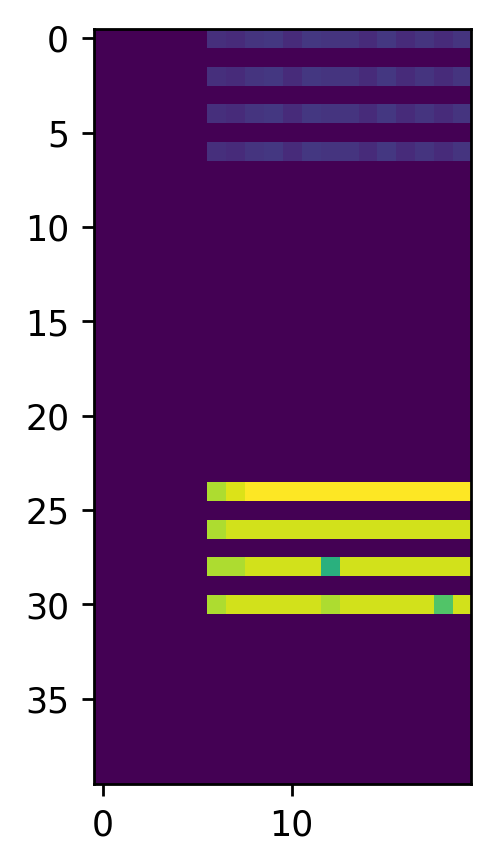

In [88]:
tensor = molecule.get_alignment_tensor(
    max_reads=8,
    centroid=molecule.spanStart,
    window_radius=10)
plt.imshow(tensor)